In [40]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('twitter_training.csv')

In [11]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [19]:
col_names =['ID','Entity','sentiments','content',]
df = pd.read_csv('twitter_training.csv', names=col_names)

In [20]:
df.head()

,ID,Entity,sentiments,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [21]:
df.shape

(74682, 4)

In [22]:
df.describe

<bound method NDFrame.describe of          ID       Entity sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that

In [25]:
df.isnull().sum()

ID              0
Entity          0
sentiments      0
content       686
dtype: int64

In [26]:
df.dropna(axis=0 , inplace=True)

In [27]:
df.isnull().sum()

ID            0
Entity        0
sentiments    0
content       0
dtype: int64

In [28]:
df.duplicated().sum()

2340

In [31]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [32]:
df.shape

(71656, 4)

In [44]:
sentiments_counts = df['sentiments'].value_counts()
sentiments_counts

sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

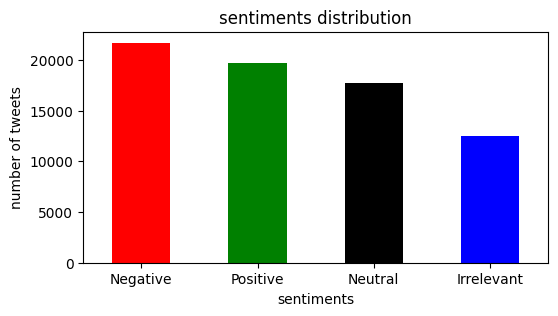

In [48]:
plt.figure(figsize=(6,3))
sentiments_counts.plot(kind='bar',color=['red','green','black','blue'])
plt.title('sentiments distribution')
plt.xlabel('sentiments')
plt.ylabel('number of tweets')
plt.xticks(rotation=0)
plt.show()
                      

In [55]:
brand_data = df[df['Entity'].str.contains('microsoft',case=False)]
brand_sentiments_counts = brand_data['sentiments'].value_counts()
brand_sentiments_counts

sentiments
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

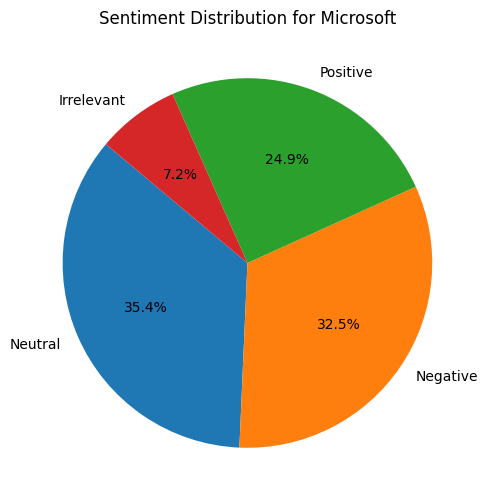

In [72]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiments_counts, labels=brand_sentiments_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()